Open the data folder within the src folder of our submission.

Upload these files in the Google Colab Files folder. This can be found in the left pane of this window by clicking on the file icon.

In [1]:
# install java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.2.0/spark-3.2.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.2.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.0-bin-hadoop3.2"

# install findspark using pip
!pip install -q findspark

# install pyspark
!pip3 install pyspark==3.2.0

# install graphframes
!pip3 install graphframes

     |████████████████████████████████| 281.3 MB 38 kB/s 
     |████████████████████████████████| 198 kB 64.5 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=f8f1e65e0bdaad3a2c3106f66fd3b8f759ea2ebbce10df2b82936ec386994018
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark
     |████████████████████████████████| 154 kB 7.9 MB/s 


In [2]:
!cp -v /content/graphframes-0.8.2-spark3.2-s_2.12.jar $SPARK_HOME/jars/

'/content/graphframes-0.8.2-spark3.2-s_2.12.jar' -> '/content/spark-3.2.0-bin-hadoop3.2/jars/graphframes-0.8.2-spark3.2-s_2.12.jar'


In [3]:
#import the packages
from pyspark import *
from pyspark.sql import *
from graphframes import *
import pandas as pd

# Start a Spark session
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [4]:
vertices_civ_complaint = spark.read.csv('/content/officer_vertices_civ_complaint3.csv', header='true', inferSchema='true')

In [5]:
vertices_pol_complaint = spark.read.csv('/content/officer_vertices_pol_complaint3.csv', header='true', inferSchema='true')

In [6]:
edges_civ_complaint = spark.read.csv('/content/civilian_edges.csv', header='true', inferSchema='true')

In [7]:
edges_pol_complaint = spark.read.csv('/content/police_edges.csv', header='true', inferSchema='true')

In [8]:
g_civ_complaint = GraphFrame(vertices_civ_complaint, edges_civ_complaint)

In [9]:
g_pol_complaint = GraphFrame(vertices_pol_complaint, edges_pol_complaint)

civilian complaint section

In [10]:
g_civ_complaint.vertices.show()

+---+-------+--------------------+-----------+------+--------+--------------------+--------------+----------------+----------------+-----------------------+-----------------+-------------------------+
| id|   crid|is_officer_complaint|disciplined|gender|    race|                rank|current_salary|allegation_count|discipline_count|honorable_mention_count|major_award_count|civilian_compliment_count|
+---+-------+--------------------+-----------+------+--------+--------------------+--------------+----------------+----------------+-----------------------+-----------------+-------------------------+
|  5|C185794|               false|       true|     M|   White|  Sergeant of Police|          null|               4|               1|                      2|                0|                        2|
|  9|C174984|               false|       true|     M|   Black|      Police Officer|          null|               3|               1|                      0|                0|                      

In [11]:
g_civ_complaint.edges.show()

+-----+-----+------------+
|  src|  dst|relationship|
+-----+-----+------------+
| 8683|24267|     1000009|
| 8683|31234|     1000009|
|24267| 8683|     1000009|
|24267|31234|     1000009|
|31234| 8683|     1000009|
|31234|24267|     1000009|
|  230| 9621|     1000199|
| 9621|  230|     1000199|
| 2295|16112|     1000214|
| 2295|19834|     1000214|
| 2295|25914|     1000214|
| 2295|28529|     1000214|
|16112| 2295|     1000214|
|16112|19834|     1000214|
|16112|25914|     1000214|
|16112|28529|     1000214|
|19834| 2295|     1000214|
|19834|16112|     1000214|
|19834|25914|     1000214|
|19834|28529|     1000214|
+-----+-----+------------+
only showing top 20 rows



In [12]:
g_civ_complaint.vertices.count()

7739

In [13]:
g_civ_complaint.edges.count()

27842

In [14]:
g_civ_complaint.inDegrees.sort(['inDegree'],ascending=[0]).show()

+-----+--------+
|   id|inDegree|
+-----+--------+
|12788|     134|
|12893|     126|
| 6387|     117|
|31756|     116|
|30111|     114|
| 5667|     113|
|22304|     112|
|29590|     112|
| 2978|     112|
| 6857|     112|
|18042|     112|
|20713|     111|
| 9555|     111|
|11589|     110|
|26851|     110|
| 7892|     110|
|23534|     110|
|  923|     110|
| 6260|     110|
|17938|     109|
+-----+--------+
only showing top 20 rows



In [15]:
g_civ_complaint.outDegrees.sort(['outDegree'],ascending=[0]).show()

+-----+---------+
|   id|outDegree|
+-----+---------+
|12788|      134|
|12893|      126|
| 6387|      117|
|31756|      116|
|30111|      114|
| 5667|      113|
|22304|      112|
|29590|      112|
| 2978|      112|
| 6857|      112|
|18042|      112|
|20713|      111|
| 9555|      111|
|11589|      110|
|26851|      110|
| 7892|      110|
|23534|      110|
|  923|      110|
| 6260|      110|
|17938|      109|
+-----+---------+
only showing top 20 rows



In [16]:
g_civ_complaint.degrees.sort(['Degree'],ascending=[0]).show()

+-----+------+
|   id|degree|
+-----+------+
|12788|   268|
|12893|   252|
| 6387|   234|
|31756|   232|
|30111|   228|
| 5667|   226|
|22304|   224|
|29590|   224|
| 2978|   224|
| 6857|   224|
|18042|   224|
|20713|   222|
| 9555|   222|
|11589|   220|
|26851|   220|
| 7892|   220|
|23534|   220|
|  923|   220|
| 6260|   220|
|17938|   218|
+-----+------+
only showing top 20 rows



In [17]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
def plot_graph(gx):
    g = nx.DiGraph(directed = False)
    
    g = nx.from_pandas_edgelist(gx.edges.toPandas(),'src','dst')
    g.add_nodes_from(gx.vertices.toPandas()['id'])

    nx.draw(g, with_labels=True, arrows = True, node_color='grey')

In [18]:
def plot_graphv2(gx, df_vertices, col='discipline_count', figsize=(16,16), mul_factor=1000, const_factor=1000):
  plt.figure(figsize=figsize)

  g = nx.DiGraph(directed = False)
  
  g = nx.from_pandas_edgelist(gx.edges.toPandas(),'src','dst')
  #g.add_nodes_from(gx.vertices.toPandas()['id'])
  #print('list of nodes',g.nodes(), len(g.nodes()), type(g.nodes()))
  nodes_list = g.nodes()
  node_sizes = []
  node_colors = []
  for cur_node in nodes_list:
    #print('cur node', cur_node, type(cur_node))
    df_filter = df_vertices[df_vertices['id'] == cur_node]
    for _, row in df_filter.iterrows():
      node_sizes.append((row[col]*mul_factor)+const_factor)
      race = row["race"]
      if race == "White":
        color = "red"
      elif race == "Black":
        color = "orange"
      elif race == "Hispanic":
        color = "brown"
      else:
        color = "yellow"
      node_colors.append(color)
      break
  #print('node sizes', node_sizes, len(node_sizes))
  #print('node colors', node_colors, len(node_colors))
  nx.draw(g, with_labels=True, arrows = True, node_color=node_colors, node_size=node_sizes)
  race_color_palette = {"White":"red", "Black":"orange", "Hispanic":"brown", "Others":"yellow"}
  race_color_handles = [Patch(color=race_color_palette[x], label=x) for x in race_color_palette.keys()]
  plt.legend(handles=race_color_handles, prop={'size':16})
  plt.show()

In [19]:
communities_civ_complaint = g_civ_complaint.labelPropagation(100)

In [20]:
communities_civ_complaint.select("label").distinct().count()

6080

In [21]:
communities_civ_complaint.groupby("label").count().sort("count", ascending=False).show(40)

+-----+-----+
|label|count|
+-----+-----+
| 6534|  176|
|19929|  112|
|14519|   48|
|29071|   22|
|30294|   19|
|28273|   15|
|   92|   15|
| 2400|   14|
|25351|   14|
|21876|   13|
|15093|   12|
|22480|   12|
| 8026|   12|
|12177|   11|
|13317|   11|
| 3851|   11|
| 2388|   11|
| 2568|   10|
|12243|   10|
|20111|   10|
|11633|    9|
|13179|    9|
|14106|    9|
| 2084|    9|
|18508|    9|
|28721|    9|
|23051|    8|
|11543|    8|
| 2326|    8|
| 4013|    8|
| 1205|    8|
|12757|    8|
|14860|    8|
|21777|    8|
| 5077|    8|
| 2137|    7|
|11693|    7|
|22432|    7|
|17285|    7|
| 9309|    7|
+-----+-----+
only showing top 40 rows



In [22]:
tc_civ_complaint = g_civ_complaint.triangleCount()

In [23]:
tc_civ_complaint.sort("count", ascending=False).show(40)

+-----+-----+-------+--------------------+-----------+------+--------+--------------------+--------------+----------------+----------------+-----------------------+-----------------+-------------------------+
|count|   id|   crid|is_officer_complaint|disciplined|gender|    race|                rank|current_salary|allegation_count|discipline_count|honorable_mention_count|major_award_count|civilian_compliment_count|
+-----+-----+-------+--------------------+-----------+------+--------+--------------------+--------------+----------------+----------------+-----------------------+-----------------+-------------------------+
| 5996|12788|C230673|               false|       true|     M|   Black|      Police Officer|         69264|              36|               6|                      8|                0|                        0|
| 5842|12893|C149209|               false|       true|     M|   White|      Police Officer|         95106|               5|               2|                      3|

In [24]:
scc_civ_complaint = g_civ_complaint.stronglyConnectedComponents(100)

In [25]:
scc_civ_complaint.show()

+-----+-------+--------------------+-----------+------+--------------------+------------------+--------------+----------------+----------------+-----------------------+-----------------+-------------------------+---------+
|   id|   crid|is_officer_complaint|disciplined|gender|                race|              rank|current_salary|allegation_count|discipline_count|honorable_mention_count|major_award_count|civilian_compliment_count|component|
+-----+-------+--------------------+-----------+------+--------------------+------------------+--------------+----------------+----------------+-----------------------+-----------------+-------------------------+---------+
|31760|1010643|               false|       true|     M|            Hispanic|    Police Officer|         90024|              23|               2|                     38|                1|                        1|    31760|
|13871|C224163|               false|       true|     M|               White|    Police Officer|         8073

In [26]:
scc_civ_complaint.select("component").distinct().count()

5097

In [27]:
scc_civ_complaint_group_by = scc_civ_complaint.groupby("component").count().sort("count", ascending=False)

In [28]:
scc_civ_complaint_group_by.show(40)

+---------+-----+
|component|count|
+---------+-----+
|       29|  640|
|      110|   20|
|     2400|   18|
|     1097|   18|
|      933|   17|
|     3447|   17|
|     1672|   16|
|     2979|   14|
|     2028|   13|
|    12176|   13|
|     1063|   13|
|     3039|   12|
|      404|   11|
|      890|   11|
|     2526|   11|
|     3851|   11|
|     8348|   10|
|     4995|   10|
|     5367|   10|
|     2295|   10|
|     6249|   10|
|     7568|   10|
|      186|    9|
|     2084|    9|
|     6138|    9|
|      745|    9|
|    10131|    8|
|     6259|    8|
|     2216|    8|
|     8684|    8|
|     4599|    8|
|     2326|    8|
|     2000|    8|
|     4680|    8|
|     2572|    8|
|     6102|    8|
|     3252|    7|
|     5766|    7|
|     1598|    7|
|     5079|    7|
+---------+-----+
only showing top 40 rows



In [29]:
scc_civ_complaint_group_by.tail(10)

[Row(component=9894, count=1),
 Row(component=12291, count=1),
 Row(component=25882, count=1),
 Row(component=15012, count=1),
 Row(component=14340, count=1),
 Row(component=2800, count=1),
 Row(component=32423, count=1),
 Row(component=15130, count=1),
 Row(component=12554, count=1),
 Row(component=14850, count=1)]

In [30]:
scc_civ_complaint_comp_110 = scc_civ_complaint.filter(scc_civ_complaint["component"] == 110)
scc_civ_complaint_comp_110.show()

+-----+-------+--------------------+-----------+------+-------------+--------------------+--------------+----------------+----------------+-----------------------+-----------------+-------------------------+---------+
|   id|   crid|is_officer_complaint|disciplined|gender|         race|                rank|current_salary|allegation_count|discipline_count|honorable_mention_count|major_award_count|civilian_compliment_count|component|
+-----+-------+--------------------+-----------+------+-------------+--------------------+--------------+----------------+----------------+-----------------------+-----------------+-------------------------+---------+
|12109|1045959|               false|       true|     M|        White|      Police Officer|         90024|              56|               6|                     20|                0|                        6|      110|
|15465|C247820|               false|       true|     M|        White|   Captain of Police|        136170|              23|      

In [31]:
def get_officer_id_list(df):
  officer_id_list = df.select("id").rdd.map(lambda row : row[0]).collect()
  return officer_id_list

In [32]:
def get_filtered_edges_df(edges_df, officer_id_list):
  filter_edges_df = edges_df.filter(edges_df["src"].isin(officer_id_list))
  return filter_edges_df

In [33]:
officer_id_list_comp_110 = get_officer_id_list(scc_civ_complaint_comp_110)
officer_id_list_comp_110

[12109,
 15465,
 4013,
 30758,
 8640,
 10351,
 29384,
 4017,
 10401,
 10742,
 12619,
 15022,
 20518,
 21912,
 5051,
 2721,
 11586,
 28965,
 19663,
 110]

In [34]:
filter_edges_civ_complaint = get_filtered_edges_df(edges_civ_complaint, officer_id_list_comp_110)
filter_edges_civ_complaint.show()

+-----+-----+------------+
|  src|  dst|relationship|
+-----+-----+------------+
| 8640|12109|     1043419|
|12109| 8640|     1043419|
|12109|29384|      275732|
|29384|12109|      275732|
| 4013| 4017|      296045|
| 4013|10351|      296045|
| 4013|29384|      296045|
| 4017| 4013|      296045|
| 4017|10351|      296045|
| 4017|29384|      296045|
|10351| 4013|      296045|
|10351| 4017|      296045|
|10351|29384|      296045|
|29384| 4013|      296045|
|29384| 4017|      296045|
|29384|10351|      296045|
|12619|28965|     C179580|
|28965|12619|     C179580|
|10351|10742|     C185384|
|10742|10351|     C185384|
+-----+-----+------------+
only showing top 20 rows



In [35]:
filter_edges_civ_complaint.count()

58

In [36]:
g_scc_civ_complaint_110 = GraphFrame(scc_civ_complaint_comp_110, filter_edges_civ_complaint)

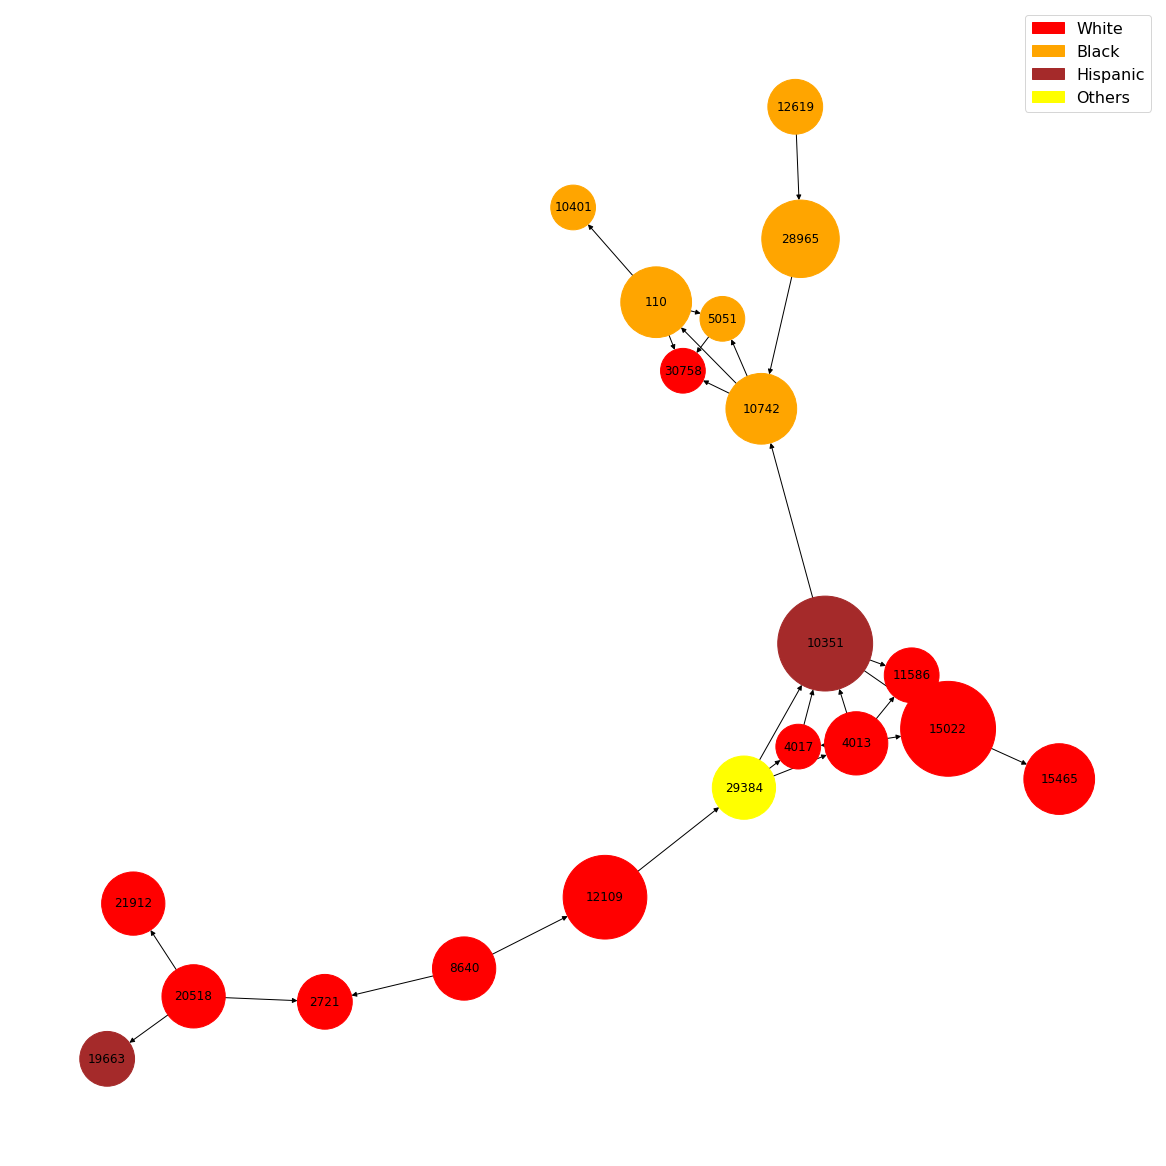

In [37]:
plot_graphv2(g_scc_civ_complaint_110, scc_civ_complaint_comp_110.toPandas())

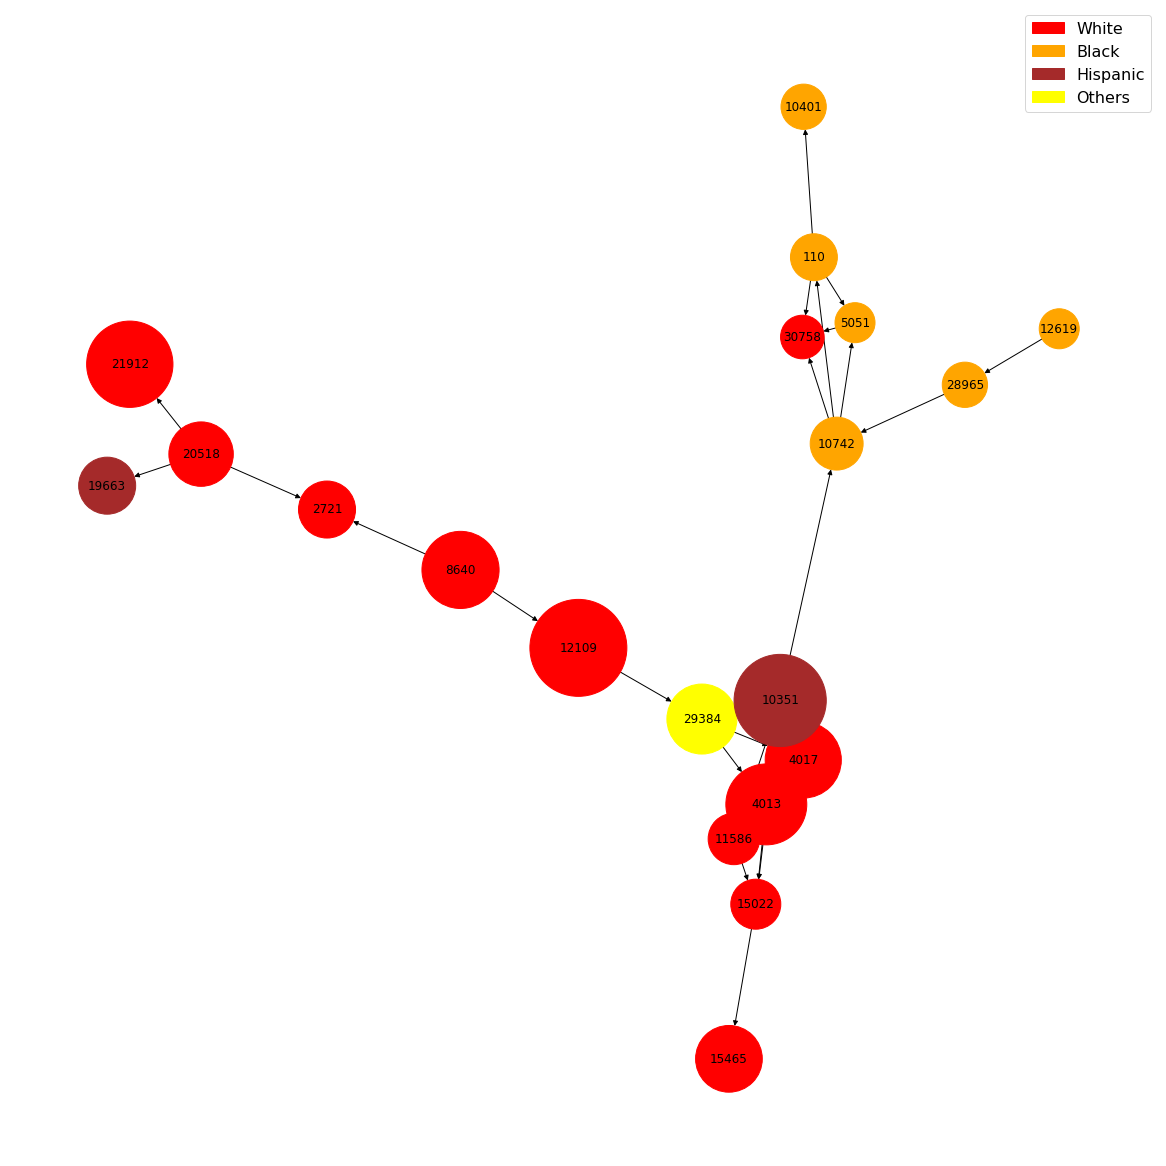

In [38]:
plot_graphv2(g_scc_civ_complaint_110, scc_civ_complaint_comp_110.toPandas(), 'allegation_count', mul_factor=150)

In [39]:
scc_civ_complaint_comp_2400 = scc_civ_complaint.filter(scc_civ_complaint["component"] == 2400)
scc_civ_complaint_comp_2400.show()

+-----+-------+--------------------+-----------+------+--------+--------------------+--------------+----------------+----------------+-----------------------+-----------------+-------------------------+---------+
|   id|   crid|is_officer_complaint|disciplined|gender|    race|                rank|current_salary|allegation_count|discipline_count|honorable_mention_count|major_award_count|civilian_compliment_count|component|
+-----+-------+--------------------+-----------+------+--------+--------------------+--------------+----------------+----------------+-----------------------+-----------------+-------------------------+---------+
|17364|1009924|               false|       true|     M|   White|      Police Officer|         93354|              12|               2|                     16|                0|                        9|     2400|
|22203|C198890|               false|       true|     M|   White|      Police Officer|          null|               3|               1|              

In [40]:
officer_id_list_comp_2400 = get_officer_id_list(scc_civ_complaint_comp_2400)
len(officer_id_list_comp_2400)

18

In [41]:
filter_edges_civ_complaint_comp_2400 = get_filtered_edges_df(edges_civ_complaint, officer_id_list_comp_2400)
filter_edges_civ_complaint_comp_2400.show()

+-----+-----+------------+
|  src|  dst|relationship|
+-----+-----+------------+
|11061|11194|      298076|
|11061|27170|      298076|
|11194|11061|      298076|
|11194|27170|      298076|
|27170|11061|      298076|
|27170|11194|      298076|
| 5045|20820|     C198890|
| 5045|22203|     C198890|
| 5045|31994|     C198890|
|20820| 5045|     C198890|
|20820|22203|     C198890|
|20820|31994|     C198890|
|22203| 5045|     C198890|
|22203|20820|     C198890|
|22203|31994|     C198890|
|31994| 5045|     C198890|
|31994|20820|     C198890|
|31994|22203|     C198890|
|11194|15747|     C218395|
|15747|11194|     C218395|
+-----+-----+------------+
only showing top 20 rows



In [42]:
filter_edges_civ_complaint_comp_2400.count()

76

In [43]:
g_scc_civ_complaint_2400 = GraphFrame(scc_civ_complaint_comp_2400, filter_edges_civ_complaint_comp_2400)

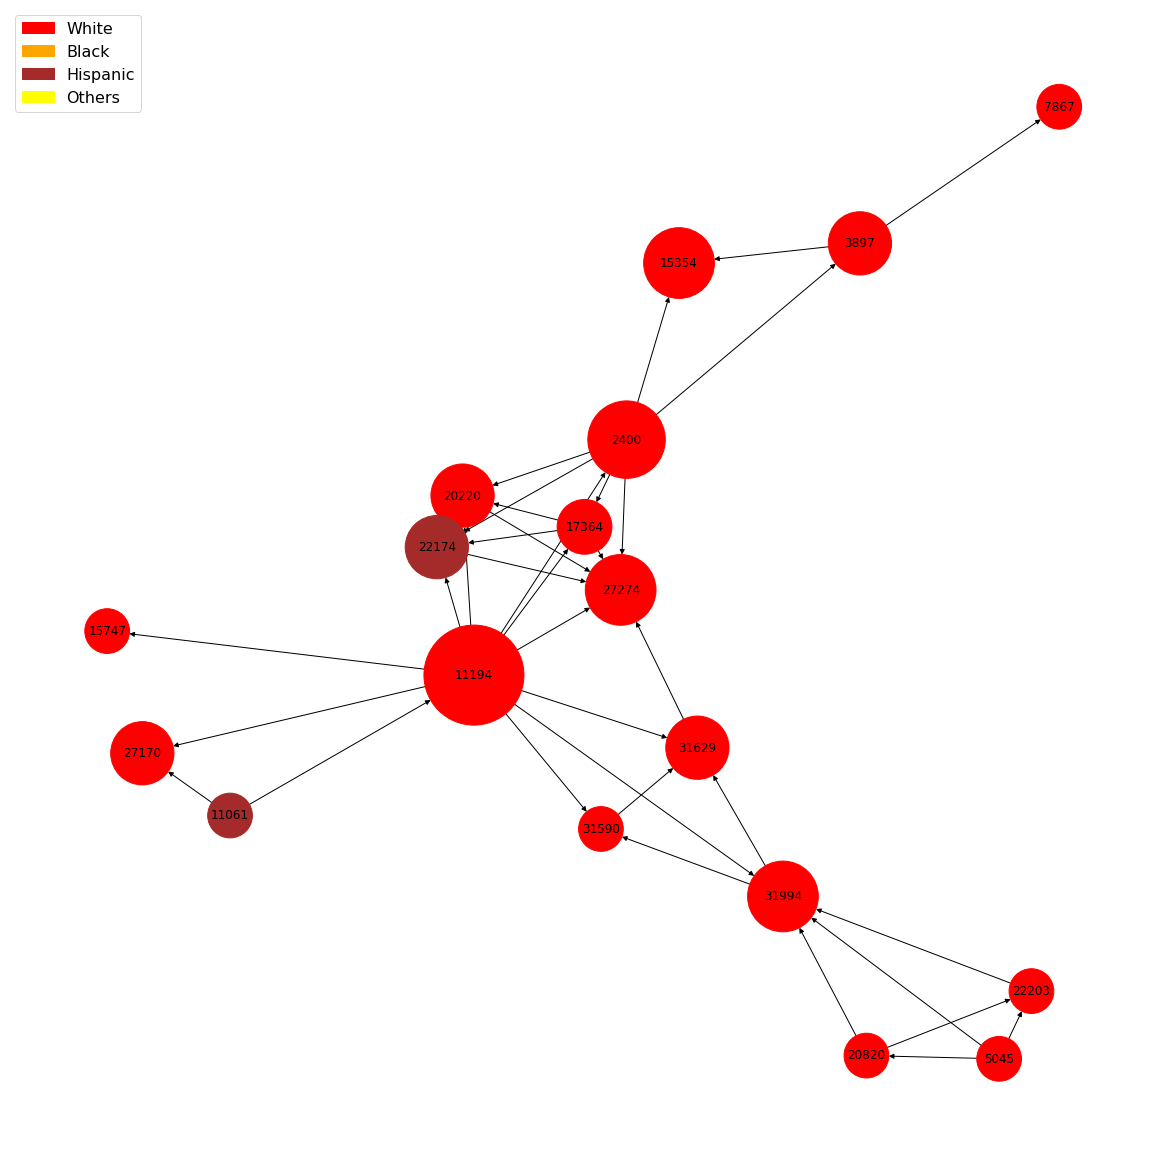

In [44]:
plot_graphv2(g_scc_civ_complaint_2400, scc_civ_complaint_comp_2400.toPandas())

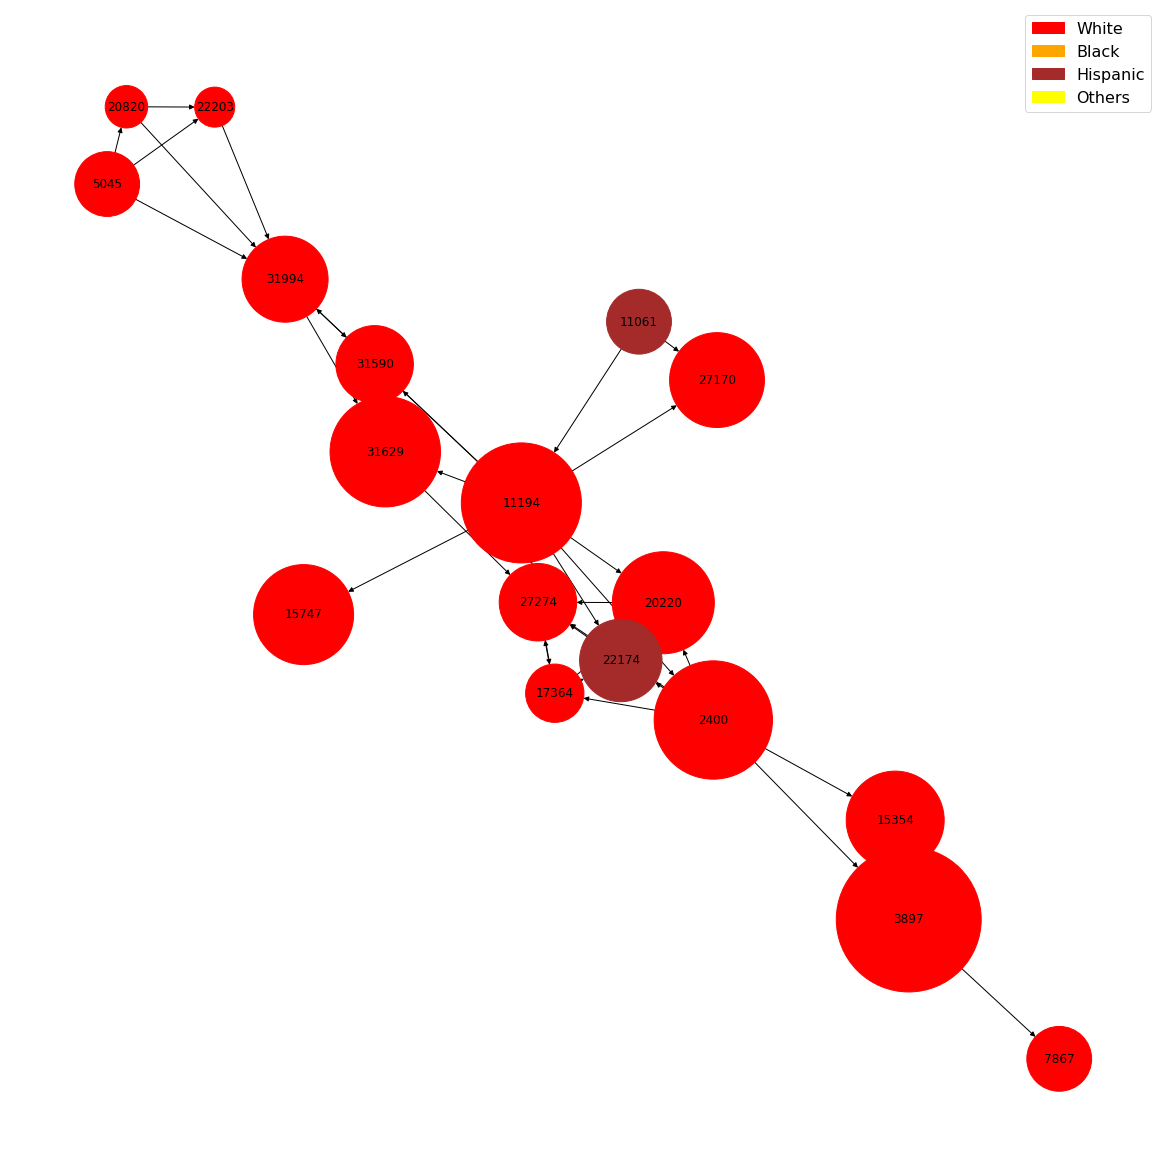

In [45]:
plot_graphv2(g_scc_civ_complaint_2400, scc_civ_complaint_comp_2400.toPandas(), 'allegation_count', mul_factor=200)

police complaint section

In [46]:
g_pol_complaint.vertices.show()

+---+-------+--------------------+-----------+------+--------------------+--------------------+--------------+----------------+----------------+-----------------------+-----------------+-------------------------+
| id|   crid|is_officer_complaint|disciplined|gender|                race|                rank|current_salary|allegation_count|discipline_count|honorable_mention_count|major_award_count|civilian_compliment_count|
+---+-------+--------------------+-----------+------+--------------------+--------------------+--------------+----------------+----------------+-----------------------+-----------------+-------------------------+
| 16|1057173|                true|       true|     M|       Asian/Pacific|  Sergeant of Police|         84054|              19|               1|                     29|                0|                        5|
| 17|1030834|                true|       true|     M|               Black|      Police Officer|         83706|              25|               1|    

In [47]:
g_pol_complaint.edges.show()

+-----+-----+------------+
|  src|  dst|relationship|
+-----+-----+------------+
|11090|17197|     1000004|
|17197|11090|     1000004|
| 8089| 9761|     1000183|
| 8089|18206|     1000183|
| 9761| 8089|     1000183|
| 9761|18206|     1000183|
|18206| 8089|     1000183|
|18206| 9761|     1000183|
|13256|15234|     1000441|
|15234|13256|     1000441|
|15126|28011|     1000442|
|28011|15126|     1000442|
|20769|20794|     1000579|
|20794|20769|     1000579|
| 3214|12081|     1000656|
|12081| 3214|     1000656|
|23334|28247|     1000776|
|28247|23334|     1000776|
| 1049|22266|     1000936|
|22266| 1049|     1000936|
+-----+-----+------------+
only showing top 20 rows



In [48]:
g_pol_complaint.vertices.count()

3905

In [49]:
g_pol_complaint.edges.count()

8200

In [50]:
g_pol_complaint.degrees.sort(['Degree'],ascending=[0]).show()

+-----+------+
|   id|degree|
+-----+------+
|  985|   136|
|17287|   136|
| 2085|   116|
| 8658|   114|
|31906|   112|
|29842|   110|
|16345|   110|
|28411|   110|
|16886|   110|
|11184|   110|
| 7261|   108|
| 3027|   108|
|13207|   108|
|12961|   108|
|23936|   108|
|22172|   108|
|19856|   106|
|21890|   106|
|16171|   106|
| 2323|   106|
+-----+------+
only showing top 20 rows



In [51]:
communities_pol_complaint = g_pol_complaint.labelPropagation(100)

In [52]:
communities_pol_complaint.select("label").distinct().count()

3326

In [53]:
communities_pol_complaint.groupby("label").count().sort("count", ascending=False).show(40)

+-----+-----+
|label|count|
+-----+-----+
| 7261|   78|
|32014|   46|
|31918|   26|
|  200|   18|
|21197|   13|
| 9001|   11|
|19292|   10|
|16762|    9|
|15228|    9|
|29403|    8|
|24459|    8|
|18906|    8|
|24247|    7|
| 9300|    7|
|18989|    7|
|29310|    7|
|11573|    7|
| 5577|    7|
|20236|    6|
|23126|    6|
|26675|    6|
|29869|    6|
|27166|    6|
|16681|    6|
| 6369|    6|
|22952|    6|
|14895|    6|
| 4599|    6|
| 5412|    5|
|32265|    5|
|22161|    5|
|23448|    5|
| 9659|    5|
|32307|    5|
| 1474|    5|
| 2325|    5|
| 9207|    4|
|13359|    4|
|30336|    4|
|17261|    4|
+-----+-----+
only showing top 40 rows



In [54]:
communities_pol_complaint.filter(communities_pol_complaint["label"] == 31918).show()

+-----+-------+--------------------+-----------+------+-------------+--------------------+--------------+----------------+----------------+-----------------------+-----------------+-------------------------+-----+
|   id|   crid|is_officer_complaint|disciplined|gender|         race|                rank|current_salary|allegation_count|discipline_count|honorable_mention_count|major_award_count|civilian_compliment_count|label|
+-----+-------+--------------------+-----------+------+-------------+--------------------+--------------+----------------+----------------+-----------------------+-----------------+-------------------------+-----+
| 6865|1053605|                true|       true|     M|        White|      Police Officer|         88296|               7|               1|                     27|                0|                        2|31918|
|16859|1053605|                true|       true|     M|     Hispanic|      Police Officer|         84054|               6|               1|     

In [55]:
tc_pol_complaint = g_pol_complaint.triangleCount()

In [56]:
tc_pol_complaint.sort("count", ascending=False).show(40)

+-----+-----+-------+--------------------+-----------+------+--------+--------------------+--------------+----------------+----------------+-----------------------+-----------------+-------------------------+
|count|   id|   crid|is_officer_complaint|disciplined|gender|    race|                rank|current_salary|allegation_count|discipline_count|honorable_mention_count|major_award_count|civilian_compliment_count|
+-----+-----+-------+--------------------+-----------+------+--------+--------------------+--------------+----------------+----------------+-----------------------+-----------------+-------------------------+
| 1483|  985| 276049|                true|       true|     M|Hispanic|      Police Officer|         83706|              54|              14|                     30|                0|                        0|
| 1483|17287| 277861|                true|       true|     M|   Black|      Police Officer|         86130|              13|               2|                      0|

In [57]:
scc_pol_complaint = g_pol_complaint.stronglyConnectedComponents(100)

In [58]:
scc_pol_complaint.select("component").distinct().count()

2879

In [59]:
scc_pol_complaint_group_by = scc_pol_complaint.groupby("component").count().sort("count", ascending=False)
scc_pol_complaint_group_by.show(20)

+---------+-----+
|component|count|
+---------+-----+
|      200|  127|
|      560|   46|
|     1900|   26|
|     4045|   12|
|     3429|   11|
|      327|    9|
|     3940|    9|
|     9152|    8|
|      249|    8|
|     2576|    8|
|     9910|    8|
|     5043|    8|
|     6864|    8|
|     3067|    7|
|     1576|    7|
|    12247|    7|
|     1435|    7|
|     1892|    7|
|      908|    7|
|     3626|    7|
+---------+-----+
only showing top 20 rows



In [60]:
scc_component_1900 = scc_pol_complaint.filter(scc_pol_complaint["component"] == 1900)
scc_component_1900.show()

+-----+-------+--------------------+-----------+------+-------------+--------------------+--------------+----------------+----------------+-----------------------+-----------------+-------------------------+---------+
|   id|   crid|is_officer_complaint|disciplined|gender|         race|                rank|current_salary|allegation_count|discipline_count|honorable_mention_count|major_award_count|civilian_compliment_count|component|
+-----+-------+--------------------+-----------+------+-------------+--------------------+--------------+----------------+----------------+-----------------------+-----------------+-------------------------+---------+
| 6865|1053605|                true|       true|     M|        White|      Police Officer|         88296|               7|               1|                     27|                0|                        2|     1900|
|16859|1053605|                true|       true|     M|     Hispanic|      Police Officer|         84054|               6|      

In [61]:
officer_id_list = scc_component_1900.select("id").rdd.map(lambda row : row[0]).collect()
officer_id_list

[6865,
 16859,
 28257,
 7330,
 24446,
 5439,
 29063,
 4447,
 14790,
 16615,
 20728,
 25678,
 3497,
 20264,
 22283,
 21453,
 3982,
 21362,
 30127,
 31918,
 1900,
 31648,
 23461,
 13313,
 23215,
 17077]

In [62]:
len(officer_id_list)

26

In [63]:
edges_pol_complaint.count()

8200

In [64]:
edges_pol_complaint.select("src").distinct().count()

1554

In [65]:
edges_pol_complaint.select("dst").distinct().count()

1554

In [66]:
filter_edges_pol_complaint = edges_pol_complaint.filter(edges_pol_complaint["src"].isin(officer_id_list))

In [67]:
filter_edges_pol_complaint.count()

650

In [68]:
g_component_1900 = GraphFrame(scc_component_1900, filter_edges_pol_complaint)

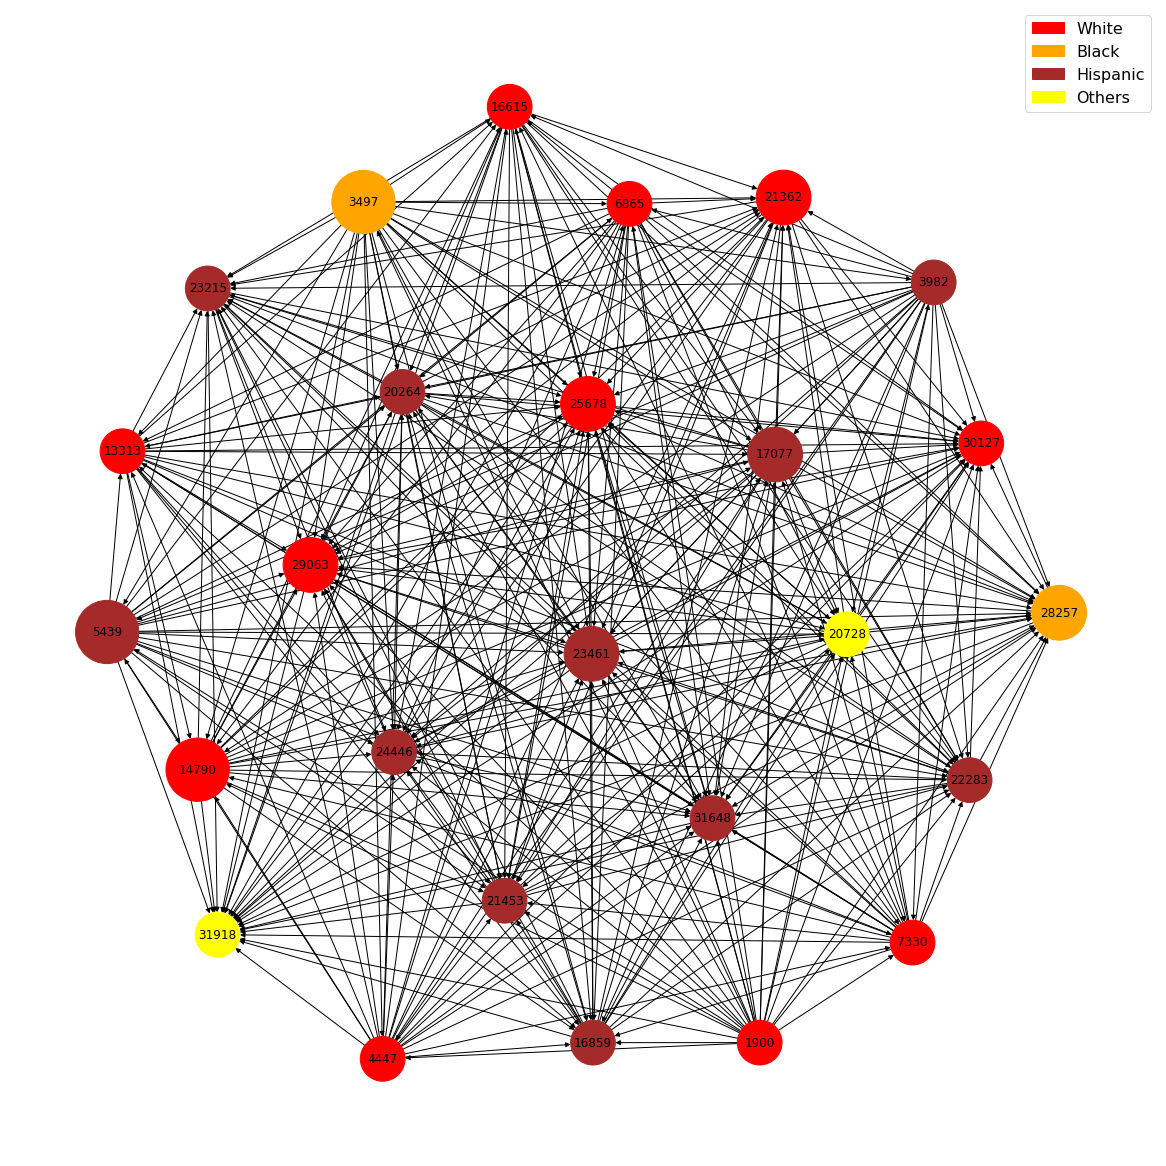

In [69]:
plot_graphv2(g_component_1900, scc_component_1900.toPandas())

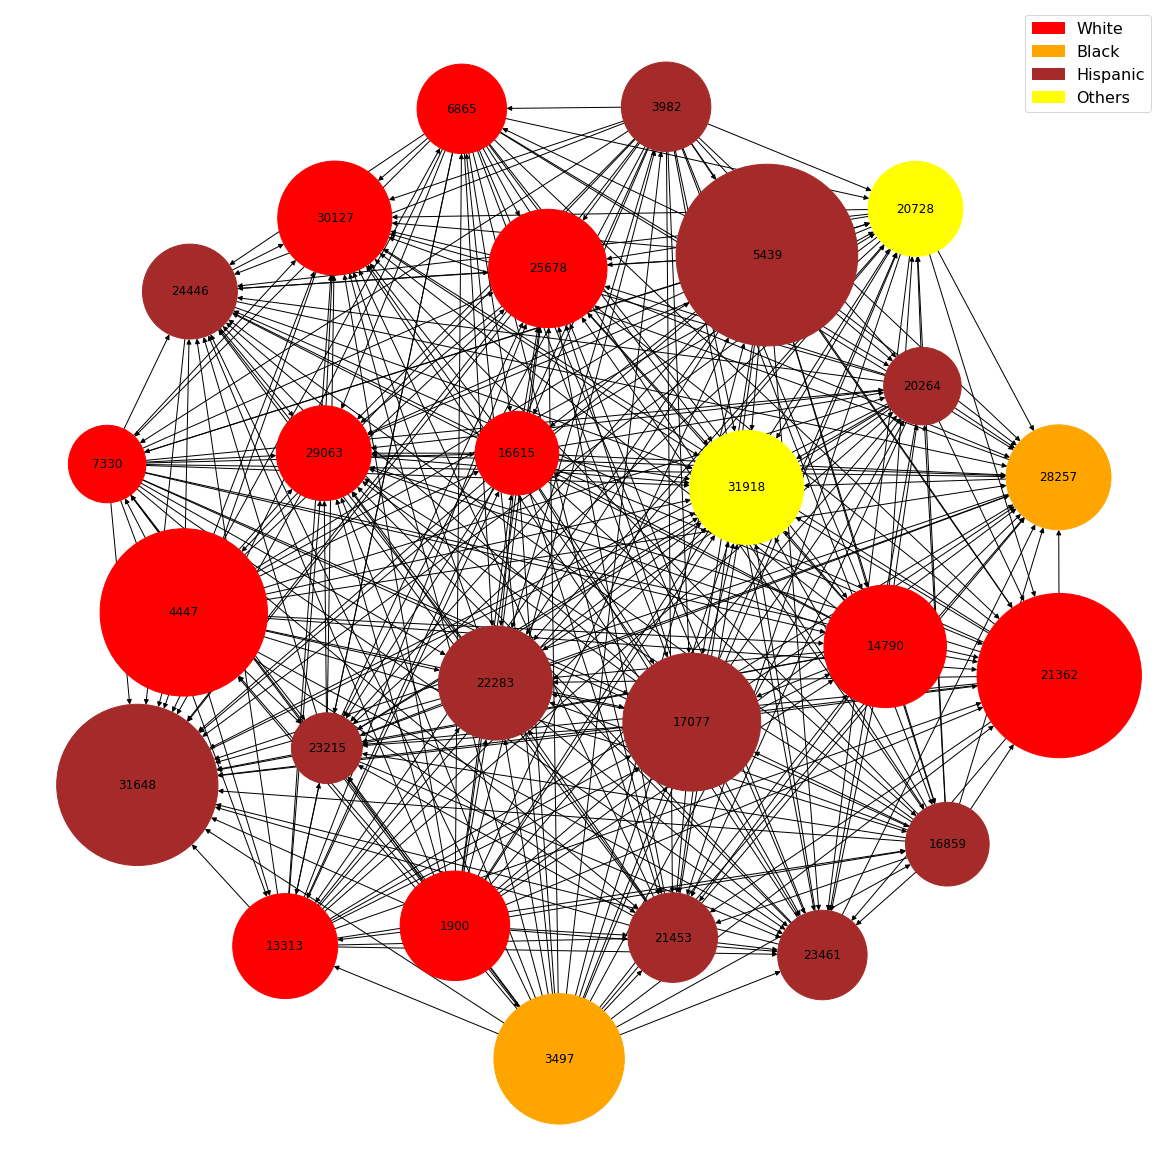

In [70]:
plot_graphv2(g_component_1900, scc_component_1900.toPandas(), 'allegation_count')